In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
raw_data=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',delimiter=',',encoding='latin-1')
del raw_data['Unnamed: 2']
del raw_data['Unnamed: 3']
del raw_data['Unnamed: 4']
raw_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
text=raw_data['v2']
print(text[0],text[1])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni...


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer()
text=vectorizer.fit_transform(text).toarray()

In [5]:
text

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
data=pd.DataFrame(text)

In [7]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,8662,8663,8664,8665,8666,8667,8668,8669,8670,8671
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data['Output']=raw_data['v1'].replace({'ham':0,'spam':1})

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,8663,8664,8665,8666,8667,8668,8669,8670,8671,Output
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [11]:
y=data.pop('Output')
x=data

x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=True)

In [12]:
model1=GaussianNB()
model1.fit(x_train,y_train)
y_pre=model1.predict(x_test)
print('Report:\n',classification_report(y_pre,y_test))
print('Confusion:\n',confusion_matrix(y_pre,y_test))

Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      1106
           1       0.92      0.57      0.71       287

    accuracy                           0.90      1393
   macro avg       0.91      0.78      0.82      1393
weighted avg       0.90      0.90      0.89      1393

Confusion:
 [[1092   14]
 [ 122  165]]


In [13]:
model1=MultinomialNB()
model1.fit(x_train,y_train)
y_pre=model1.predict(x_test)
print('Report:\n',classification_report(y_pre,y_test))
print('Confusion:\n',confusion_matrix(y_pre,y_test))

Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1259
           1       0.75      1.00      0.86       134

    accuracy                           0.97      1393
   macro avg       0.87      0.98      0.92      1393
weighted avg       0.98      0.97      0.97      1393

Confusion:
 [[1214   45]
 [   0  134]]


In [14]:
model1=BernoulliNB()
model1.fit(x_train,y_train)
y_pre=model1.predict(x_test)
print('Report:\n',classification_report(y_pre,y_test))
print('Confusion:\n',confusion_matrix(y_pre,y_test))

Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1230
           1       0.90      0.99      0.94       163

    accuracy                           0.99      1393
   macro avg       0.95      0.99      0.97      1393
weighted avg       0.99      0.99      0.99      1393

Confusion:
 [[1212   18]
 [   2  161]]


Iteration 1, loss = 0.53931177
Iteration 2, loss = 0.31749079
Iteration 3, loss = 0.17416256
Iteration 4, loss = 0.08971885
Iteration 5, loss = 0.04197840
Iteration 6, loss = 0.01359231
Iteration 7, loss = 0.00447814
Iteration 8, loss = 0.00198429
Iteration 9, loss = 0.00099806
Iteration 10, loss = 0.00054739
Iteration 11, loss = 0.00036011
Iteration 12, loss = 0.00027784
Iteration 13, loss = 0.00023033
Iteration 14, loss = 0.00020468
Iteration 15, loss = 0.00018759
Iteration 16, loss = 0.00017449
Iteration 17, loss = 0.00016542
Iteration 18, loss = 0.00015713
Iteration 19, loss = 0.00014955
Iteration 20, loss = 0.00014343
Iteration 21, loss = 0.00013849
Iteration 22, loss = 0.00013484
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1226
           1       0.92      0.99      0.95       167

    accuracy                           0.9

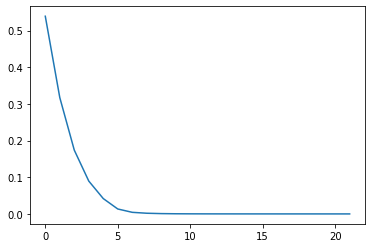

In [15]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

model=MLPClassifier(verbose=True,hidden_layer_sizes=(80,80,80,),max_iter=2000)
model.fit(x_train,y_train)
y_pre=model.predict(x_test)
print('Report:\n',classification_report(y_pre,y_test))
print('Confusion:\n',confusion_matrix(y_pre,y_test))
plt.plot(model.loss_curve_)
plt.show()